In [1]:
    import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_iris
import math

In [2]:
df = pd.read_csv("/Users/nglongvu1002/Desktop/fraudTest.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555719 entries, 0 to 555718
Data columns (total 23 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Unnamed: 0             555719 non-null  int64  
 1   trans_date_trans_time  555719 non-null  object 
 2   cc_num                 555719 non-null  int64  
 3   merchant               555719 non-null  object 
 4   category               555719 non-null  object 
 5   amt                    555719 non-null  float64
 6   first                  555719 non-null  object 
 7   last                   555719 non-null  object 
 8   gender                 555719 non-null  object 
 9   street                 555719 non-null  object 
 10  city                   555719 non-null  object 
 11  state                  555719 non-null  object 
 12  zip                    555719 non-null  int64  
 13  lat                    555719 non-null  float64
 14  long                   555719 non-nu

In [4]:
#Display the data
df.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,...,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,...,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,...,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0
3,3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,...,28.5697,-80.8191,54767,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0
4,4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,...,44.2529,-85.0170,1126,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555719 entries, 0 to 555718
Data columns (total 23 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Unnamed: 0             555719 non-null  int64  
 1   trans_date_trans_time  555719 non-null  object 
 2   cc_num                 555719 non-null  int64  
 3   merchant               555719 non-null  object 
 4   category               555719 non-null  object 
 5   amt                    555719 non-null  float64
 6   first                  555719 non-null  object 
 7   last                   555719 non-null  object 
 8   gender                 555719 non-null  object 
 9   street                 555719 non-null  object 
 10  city                   555719 non-null  object 
 11  state                  555719 non-null  object 
 12  zip                    555719 non-null  int64  
 13  lat                    555719 non-null  float64
 14  long                   555719 non-nu

In [6]:
#Sum the missing value
df.isnull().sum()

Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

In [7]:
#Summary the description of the dataset
df.describe()

,Unnamed: 0,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
count,555719.000000,5.557190e+05,555719.000000,555719.000000,555719.000000,555719.000000,5.557190e+05,5.557190e+05,555719.000000,555719.000000,555719.000000
mean,277859.000000,4.178387e+17,69.392810,48842.628015,38.543253,-90.231325,8.822189e+04,1.380679e+09,38.542798,-90.231380,0.003860
std,160422.401459,1.309837e+18,156.745941,26855.283328,5.061336,13.721780,3.003909e+05,5.201104e+06,5.095829,13.733071,0.062008
min,0.000000,6.041621e+10,1.000000,1257.000000,20.027100,-165.672300,2.300000e+01,1.371817e+09,19.027422,-166.671575,0.000000
25%,138929.500000,1.800429e+14,9.630000,26292.000000,34.668900,-96.798000,7.410000e+02,1.376029e+09,34.755302,-96.905129,0.000000
50%,277859.000000,3.521417e+15,47.290000,48174.000000,39.371600,-87.476900,2.408000e+03,1.380762e+09,39.376593,-87.445204,0.000000
75%,416788.500000,4.635331e+15,83.010000,72011.000000,41.894800,-80.175200,1.968500e+04,1.385867e+09,41.954163,-80.264637,0.000000
max,555718.000000,4.992346e+18,22768.110000,99921.000000,65.689900,-67.950300,2.906700e+06,1.388534e+09,66.679297,-66.952026,1.000000


In [8]:
#Distribute the class
df[('is_fraud')].value_counts()

is_fraud
0    553574
1      2145
Name: count, dtype: int64

In [9]:
#Split the column trans_date_trans_time into 2 separate columns, including trans_date and trans_time
df['trans_date'] = pd.to_datetime(df['trans_date_trans_time'], format='%Y-%m-%d %H:%M:%S').dt.date
df['trans_time'] = pd.to_datetime(df['trans_date_trans_time'], format='%Y-%m-%d %H:%M:%S').dt.time
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555719 entries, 0 to 555718
Data columns (total 25 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Unnamed: 0             555719 non-null  int64  
 1   trans_date_trans_time  555719 non-null  object 
 2   cc_num                 555719 non-null  int64  
 3   merchant               555719 non-null  object 
 4   category               555719 non-null  object 
 5   amt                    555719 non-null  float64
 6   first                  555719 non-null  object 
 7   last                   555719 non-null  object 
 8   gender                 555719 non-null  object 
 9   street                 555719 non-null  object 
 10  city                   555719 non-null  object 
 11  state                  555719 non-null  object 
 12  zip                    555719 non-null  int64  
 13  lat                    555719 non-null  float64
 14  long                   555719 non-nu

In [10]:
# Remove the 'trans_date_trans_time' column
# Check if the index column exists and remove it
if 'Unnamed: 0' in df.columns:
    df.drop(columns=['Unnamed: 0'], inplace=True)
df.drop('trans_date_trans_time', axis=1, inplace=True)

In [11]:
# Reorder the columns to have 'trans_date' first and 'trans_time' second
columns = ['trans_date', 'trans_time'] + [col for col in df.columns if col not in ['trans_date', 'trans_time']]
df = df[columns]

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555719 entries, 0 to 555718
Data columns (total 23 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   trans_date  555719 non-null  object 
 1   trans_time  555719 non-null  object 
 2   cc_num      555719 non-null  int64  
 3   merchant    555719 non-null  object 
 4   category    555719 non-null  object 
 5   amt         555719 non-null  float64
 6   first       555719 non-null  object 
 7   last        555719 non-null  object 
 8   gender      555719 non-null  object 
 9   street      555719 non-null  object 
 10  city        555719 non-null  object 
 11  state       555719 non-null  object 
 12  zip         555719 non-null  int64  
 13  lat         555719 non-null  float64
 14  long        555719 non-null  float64
 15  city_pop    555719 non-null  int64  
 16  job         555719 non-null  object 
 17  dob         555719 non-null  object 
 18  trans_num   555719 non-null  object 
 19  un

From the dtype of the dataset, we still have some tasks to do with the dtype. First of all, trans_date needed to be transferred from object/string to datetime

In [13]:
# Convert 'dob' to datetime
df['dob'] = pd.to_datetime(df['dob'], format='%Y-%m-%d')

# Convert 'trans_time' to time
df['trans_time'] = pd.to_datetime(df['trans_time'], format='%H:%M:%S').dt.time

# Convert 'trans_date' to date
df['trans_date'] = pd.to_datetime(df['trans_date'])

# Check the data types
print("\nData types of the columns:")
print(df.dtypes)


Data types of the columns:
trans_date    datetime64[ns]
trans_time            object
cc_num                 int64
merchant              object
category              object
amt                  float64
first                 object
last                  object
gender                object
street                object
city                  object
state                 object
zip                    int64
lat                  float64
long                 float64
city_pop               int64
job                   object
dob           datetime64[ns]
trans_num             object
unix_time              int64
merch_lat            float64
merch_long           float64
is_fraud               int64
dtype: object


# Feature Engineering

## 1. Transaction Frequency Features


In [14]:
#Statistic summary of total transaction per user
df['cc_num'].value_counts().agg(['mean', 'median', 'min', 'max'])

mean       601.427489
median     634.500000
min          6.000000
max       1474.000000
Name: count, dtype: float64

In [15]:
# Total transactions of all users per day
df['transactions_per_day'] = df.groupby(['cc_num', df['trans_date'].dt.day])['trans_date'].transform('count')

print(df[['cc_num', 'trans_date', 'transactions_per_day']].head())


             cc_num trans_date  transactions_per_day
0  2291163933867244 2020-06-21                    21
1  3573030041201292 2020-06-21                    36
2  3598215285024754 2020-06-21                    45
3  3591919803438423 2020-06-21                    29
4  3526826139003047 2020-06-21                    29


In [16]:
# Create a 'Week' column using ISO calendar weeks
df['Week'] = df['trans_date'].dt.isocalendar().week

# Calculate total transactions per week for each customer
df['transaction_per_week'] = df.groupby(['cc_num', 'Week'])['trans_date'].transform('count')

# Display the updated dataframe with Week and total transactions per Week each customer columns
print(df[['cc_num', 'Week', 'transaction_per_week']].head())

             cc_num  Week  transaction_per_week
0  2291163933867244    25                     2
1  3573030041201292    25                     4
2  3598215285024754    25                     3
3  3591919803438423    25                     3
4  3526826139003047    25                     4


In [17]:
# Calculate total transactions per month for all users
total_transactions_per_month = df.groupby(df['trans_date'].dt.month).size()
# Display the total transactions per month
print(total_transactions_per_month)

trans_date
6      30058
7      85848
8      88759
9      69533
10     69348
11     72635
12    139538
dtype: int64


In [18]:
# Total transactions of all users per day
df['transactions_per_month'] = df.groupby(['cc_num', df['trans_date'].dt.month])['trans_date'].transform('count')
print(df[['cc_num', 'trans_date', 'transactions_per_month']].head())

             cc_num trans_date  transactions_per_month
0  2291163933867244 2020-06-21                      34
1  3573030041201292 2020-06-21                      49
2  3598215285024754 2020-06-21                      55
3  3591919803438423 2020-06-21                      33
4  3526826139003047 2020-06-21                      56


In [19]:
#Transaction per season of all users
def season(date):
    if date.month in [1, 2, 3]:
        return 'Autumn'
    elif date.month in [4, 5, 6]:
        return 'Winter'
    elif date.month in [7, 8, 9]:
        return 'Spring'
    else:
        return 'Summer'
df['transactions_per_season'] = df.groupby(['cc_num', df['trans_date'].apply(season)])['trans_date'].transform('count')

## 2. User Transaction Behavior

In [20]:
## Perform the aggregations
agg_df = df.groupby('cc_num')['amt'].agg(
    avg_trans_amount='mean',
    total_trans_amount='sum',
    med_trans_amount='median',
    std_trans_amount='std'
).reset_index()

# Merge the aggregation results back to the original DataFrame
df = df.merge(agg_df, on='cc_num', how='left')



In [21]:
df

,trans_date,trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,is_fraud,transactions_per_day,Week,transaction_per_week,transactions_per_month,transactions_per_season,avg_trans_amount,total_trans_amount,med_trans_amount,std_trans_amount
0,2020-06-21,12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,...,0,21,25,2,34,34,61.893062,39611.56,44.230,158.690646
1,2020-06-21,12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,...,0,36,25,4,49,49,53.596523,44860.29,35.590,102.395948
2,2020-06-21,12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,...,0,45,25,3,55,55,83.053812,89116.74,54.290,103.740968
3,2020-06-21,12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,...,0,29,25,3,33,33,59.207526,39254.59,39.680,108.530732
4,2020-06-21,12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,...,0,29,25,4,56,56,55.274501,49249.58,37.670,76.159193
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
555714,2020-12-31,23:59:07,30560609640617,fraud_Reilly and Sons,health_fitness,43.77,Michael,Olson,M,558 Michael Estates,...,0,8,53,24,172,335,72.595446,45589.94,40.395,158.873104
555715,2020-12-31,23:59:09,3556613125071656,fraud_Hoppe-Parisian,kids_pets,111.84,Jose,Vasquez,M,572 Davis Mountains,...,0,23,53,47,286,557,46.529792,51415.42,20.690,108.069341
555716,2020-12-31,23:59:15,6011724471098086,fraud_Rau-Robel,kids_pets,86.88,Ann,Lawson,F,144 Evans Islands Apt. 683,...,0,20,53,36,295,540,92.682790,100004.73,54.360,143.328587
555717,2020-12-31,23:59:24,4079773899158,fraud_Breitenberg LLC,travel,7.99,Eric,Preston,M,7020 Doyle Stream Apt. 951,...,0,11,53,25,201,441,58.129411,51328.27,36.880,79.056680


## 3. User-Based Features: Age and Gender

In [22]:
#Calculate user's age based on date of birth and transaction date
def calculate_age(dob, trans_date):
    return trans_date.year - dob.year - ((trans_date.month, trans_date.day) < (dob.month, dob.day))
df['age'] = df.apply(lambda row: calculate_age(row['dob'], row['trans_date']), axis=1)

#Explore age stat
df['age'].agg(['mean', 'median', 'min', 'max'])

mean      46.390496
median    44.000000
min       15.000000
max       96.000000
Name: age, dtype: float64

In [23]:
#Convert gender to binary values
print('\n The number of cutomers based on age is:')
print(df['gender'].value_counts())
print("-" * 40)

#Total transaction amount by gender
print('\nTotal transaction amount made by gender is:')
print(df.groupby('gender')['amt'].sum())
print("-" * 40)

#Average transaction made by gender
print('\n Average transaction amount made by gender is:')
print(df.groupby('gender')['amt'].mean())
print("-" * 40)

# Calculate mean and median of age distribution by gender
print('\n Age Distribution by gender is:')
print(df.groupby('gender')['age'].agg(['mean', 'median']))
print("-" * 40)




 The number of cutomers based on age is:
gender
F    304886
M    250833
Name: count, dtype: int64
----------------------------------------

Total transaction amount made by gender is:
gender
F    21155705.55
M    17407197.56
Name: amt, dtype: float64
----------------------------------------

 Average transaction amount made by gender is:
gender
F    69.388905
M    69.397558
Name: amt, dtype: float64
----------------------------------------

 Age Distribution by gender is:
             mean  median
gender                   
F       46.300604    44.0
M       46.499759    45.0
----------------------------------------


## 4. Fraud Transaction Analysis

In [24]:
fraud_transactions_per_user = df.groupby('cc_num')['is_fraud'].sum().reset_index()
total_transactions_per_user = df.groupby('cc_num').size().reset_index(name='total_transactions')
fraud_ratio_per_user = pd.merge(fraud_transactions_per_user, total_transactions_per_user, on='cc_num')


#Calculate ratio of fraudulent transactions to total transactions
fraud_ratio_per_user['fraud_ratio'] = fraud_ratio_per_user['is_fraud'] /fraud_ratio_per_user['total_transactions']

# Print formatted output
print('\nThe ratio of fraudulent transaction to total transaction per user:')
for index, row in fraud_ratio_per_user.iterrows():
    print(f"Credit Card Number {int(row['cc_num'])}: {row['fraud_ratio']:.2%}")



The ratio of fraudulent transaction to total transaction per user:
Credit Card Number 60416207185: 0.00%
Credit Card Number 60422928733: 0.00%
Credit Card Number 60423098130: 0.00%
Credit Card Number 60427851591: 0.00%
Credit Card Number 60487002085: 3.35%
Credit Card Number 60490596305: 0.00%
Credit Card Number 60495593109: 5.36%
Credit Card Number 501802953619: 0.00%
Credit Card Number 501828204849: 0.00%
Credit Card Number 501831082224: 0.00%
Credit Card Number 501882822387: 5.08%
Credit Card Number 501899453424: 0.00%
Credit Card Number 502012776709: 0.00%
Credit Card Number 502038091380: 0.00%
Credit Card Number 502049568400: 0.00%
Credit Card Number 503848303379: 0.00%
Credit Card Number 503851367360: 100.00%
Credit Card Number 503874407318: 0.00%
Credit Card Number 560881134780: 0.00%
Credit Card Number 561942763351: 0.00%
Credit Card Number 565399283797: 0.00%
Credit Card Number 567868110212: 0.00%
Credit Card Number 568279015842: 0.00%
Credit Card Number 570273151375: 5.58%
C

## 5. Geography Analysis

### 5.1 Distance calculation using Haversine calculation

This function  the great-circle distance between two points on the Earth's surface given their latitude and longitude coordinates. This function can be applied to gain insights from a dataset that includes geographical information, such as the coordinates of customer locations and merchant locations. 
* Are customers close to their preferred merchants? 
* Customer segmentation (near, moderate, far)
* 

In [25]:
# Create the Haversine function using transaction longitude and latitude, also using merchant's longitude and latitude
def haversine(lat1, lon1, lat2, lon2):
    # Distance between latitudes and longitudes
    dLat = (lat2 - lat1) * math.pi / 180.0
    dLon = (lon2 - lon1) * math.pi / 180.0

    # Convert to radians
    lat1 = (lat1) * math.pi / 180.0
    lat2 = (lat2) * math.pi / 180.0

    # Apply formula
    a = (pow(math.sin(dLat / 2), 2) +
         pow(math.sin(dLon / 2), 2) *
         math.cos(lat1) * math.cos(lat2))
    rad = 6371
    c = 2 * math.asin(math.sqrt(a))
    return rad * c

df['distance_to_merch'] = df.apply(lambda row: haversine(row['lat'], row['long'], row['merch_lat'], row['merch_long']), axis=1)


In [26]:
df

,trans_date,trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,Week,transaction_per_week,transactions_per_month,transactions_per_season,avg_trans_amount,total_trans_amount,med_trans_amount,std_trans_amount,age,distance_to_merch
0,2020-06-21,12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,...,25,2,34,34,61.893062,39611.56,44.230,158.690646,52,24.561462
1,2020-06-21,12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,...,25,4,49,49,53.596523,44860.29,35.590,102.395948,30,104.925092
2,2020-06-21,12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,...,25,3,55,55,83.053812,89116.74,54.290,103.740968,49,59.080078
3,2020-06-21,12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,...,25,3,33,33,59.207526,39254.59,39.680,108.530732,32,27.698567
4,2020-06-21,12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,...,25,4,56,56,55.274501,49249.58,37.670,76.159193,64,104.335106
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
555714,2020-12-31,23:59:07,30560609640617,fraud_Reilly and Sons,health_fitness,43.77,Michael,Olson,M,558 Michael Estates,...,53,24,172,335,72.595446,45589.94,40.395,158.873104,54,77.026148
555715,2020-12-31,23:59:09,3556613125071656,fraud_Hoppe-Parisian,kids_pets,111.84,Jose,Vasquez,M,572 Davis Mountains,...,53,47,286,557,46.529792,51415.42,20.690,108.069341,21,100.074420
555716,2020-12-31,23:59:15,6011724471098086,fraud_Rau-Robel,kids_pets,86.88,Ann,Lawson,F,144 Evans Islands Apt. 683,...,53,36,295,540,92.682790,100004.73,54.360,143.328587,39,80.759302
555717,2020-12-31,23:59:24,4079773899158,fraud_Breitenberg LLC,travel,7.99,Eric,Preston,M,7020 Doyle Stream Apt. 951,...,53,25,201,441,58.129411,51328.27,36.880,79.056680,55,52.933240


In [27]:
# Aggregate transaction amounts by city
print("Aggregated transaction amounts by city:")
print(df.groupby('city')['amt'].sum().reset_index())
print("-" * 40)

# Aggregate transaction amounts by state
state_agg = df.groupby('state')['amt'].sum().reset_index()
print("Aggregated transaction amounts by state:")
print(df.groupby('state')['amt'].sum().reset_index())
print("-" * 40)



Aggregated transaction amounts by city:
                          city       amt
0                      Achille   9511.00
1                      Acworth  80383.39
2                        Adams  20631.64
3                        Afton  59000.66
4                        Akron  18512.11
..                         ...       ...
844                Woods Cross  20281.72
845                  Woodville  42032.17
846  Yellowstone National Park  16073.89
847                    Zaleski  59080.41
848                    Zavalla  47801.39

[849 rows x 2 columns]
----------------------------------------
Aggregated transaction amounts by state:
   state         amt
0     AK    66071.94
1     AL  1127922.81
2     AR  1027950.44
3     AZ   347901.59
4     CA  1768791.26
5     CO   447073.46
6     CT   205176.90
7     DC   108781.32
8     FL  1293183.50
9     GA   780302.43
10    HI    64858.25
11    IA   770590.61
12    ID   197705.27
13    IL  1309975.89
14    IN   846750.31
15    KS   711303.48
16   

In [28]:
df

,trans_date,trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,Week,transaction_per_week,transactions_per_month,transactions_per_season,avg_trans_amount,total_trans_amount,med_trans_amount,std_trans_amount,age,distance_to_merch
0,2020-06-21,12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,...,25,2,34,34,61.893062,39611.56,44.230,158.690646,52,24.561462
1,2020-06-21,12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,...,25,4,49,49,53.596523,44860.29,35.590,102.395948,30,104.925092
2,2020-06-21,12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,...,25,3,55,55,83.053812,89116.74,54.290,103.740968,49,59.080078
3,2020-06-21,12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,...,25,3,33,33,59.207526,39254.59,39.680,108.530732,32,27.698567
4,2020-06-21,12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,...,25,4,56,56,55.274501,49249.58,37.670,76.159193,64,104.335106
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
555714,2020-12-31,23:59:07,30560609640617,fraud_Reilly and Sons,health_fitness,43.77,Michael,Olson,M,558 Michael Estates,...,53,24,172,335,72.595446,45589.94,40.395,158.873104,54,77.026148
555715,2020-12-31,23:59:09,3556613125071656,fraud_Hoppe-Parisian,kids_pets,111.84,Jose,Vasquez,M,572 Davis Mountains,...,53,47,286,557,46.529792,51415.42,20.690,108.069341,21,100.074420
555716,2020-12-31,23:59:15,6011724471098086,fraud_Rau-Robel,kids_pets,86.88,Ann,Lawson,F,144 Evans Islands Apt. 683,...,53,36,295,540,92.682790,100004.73,54.360,143.328587,39,80.759302
555717,2020-12-31,23:59:24,4079773899158,fraud_Breitenberg LLC,travel,7.99,Eric,Preston,M,7020 Doyle Stream Apt. 951,...,53,25,201,441,58.129411,51328.27,36.880,79.056680,55,52.933240


In [29]:
df['is_fraud'].value_counts()

is_fraud
0    553574
1      2145
Name: count, dtype: int64

#### Resampling dataset

In [30]:

class_count_0, class_count_1 = df['is_fraud'].value_counts()

# Separate the DataFrame into two classes
class_0 = df[df['is_fraud'] == 0]
class_1 = df[df['is_fraud'] == 1]

# Print the shape of each class
print('Class 0:', class_0.shape)
print('Class 1:', class_1.shape)

Class 0: (553574, 34)
Class 1: (2145, 34)


Undersampled dataset shape: (4290, 34)
is_fraud
0    2145
1    2145
Name: count, dtype: int64


<Axes: title={'center': 'count(target)'}, xlabel='is_fraud'>

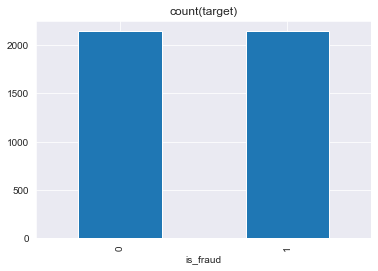

In [31]:
# Undersample the majority class
class_0_under = class_0.sample(class_count_1)

# Combine the undersampled majority class with the minority class
df_under = pd.concat([class_0_under, class_1], axis=0)

print('Undersampled dataset shape:', df_under.shape)
print(df_under['is_fraud'].value_counts())
df_under['is_fraud'].value_counts().plot(kind ='bar', title='count(target)')

In [32]:
df_under


,trans_date,trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,Week,transaction_per_week,transactions_per_month,transactions_per_season,avg_trans_amount,total_trans_amount,med_trans_amount,std_trans_amount,age,distance_to_merch
485683,2020-12-15,23:21:13,370877495212014,"fraud_Douglas, Schneider and Turner",shopping_pos,97.36,Sarah,Clark,F,25961 Beverly Union Apt. 042,...,51,65,275,542,90.894272,97438.66,55.220,126.128936,36,86.080790
158810,2020-08-16,08:16:18,571844099986,fraud_Ankunding LLC,shopping_net,35.69,Susan,Mills,F,005 Cody Estates,...,33,25,92,267,74.581400,48477.91,53.475,132.040926,68,81.588311
118634,2020-08-02,03:45:45,4761403817546679245,"fraud_Olson, Becker and Koch",gas_transport,67.76,Diana,Jacobs,F,69608 Perez Mountain Apt. 006,...,31,26,103,293,60.878688,39449.39,35.480,114.020127,34,53.691356
303331,2020-10-13,15:27:15,180011453250192,fraud_Lubowitz-Walter,kids_pets,57.78,Craig,Dunn,M,721 Jacqueline Brooks,...,42,23,102,438,97.984877,83973.04,75.490,97.454044,27,118.316175
131317,2020-08-05,23:25:27,38588538868506,fraud_Upton PLC,entertainment,10.96,Jacqueline,Curry,F,3047 Jeff Place,...,32,25,139,390,55.301033,48167.20,32.090,117.561412,29,52.175281
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
517197,2020-12-22,22:05:48,2242176657877538,"fraud_Willms, Kris and Bergnaum",shopping_pos,1041.51,Travis,Daniel,M,1327 Rose Causeway Apt. 610,...,52,10,10,10,686.806000,6868.06,867.050,419.152774,61,6.945705
517274,2020-12-22,22:18:07,2242176657877538,fraud_Kuhn LLC,shopping_pos,868.09,Travis,Daniel,M,1327 Rose Causeway Apt. 610,...,52,10,10,10,686.806000,6868.06,867.050,419.152774,61,75.956505
517341,2020-12-22,22:31:48,2242176657877538,"fraud_Mosciski, Ziemann and Farrell",shopping_net,1039.42,Travis,Daniel,M,1327 Rose Causeway Apt. 610,...,52,10,10,10,686.806000,6868.06,867.050,419.152774,61,36.534673
517529,2020-12-22,23:06:03,2242176657877538,fraud_Bauch-Raynor,grocery_pos,289.27,Travis,Daniel,M,1327 Rose Causeway Apt. 610,...,52,10,10,10,686.806000,6868.06,867.050,419.152774,61,48.808449
